# Day 1


## Warm up

In [ ]:
import matplotlib.pyplot as plt
import os
import sys
import pandas as pd
import numpy as np
import openpyxl

# Paths and directory
current_directory = os.getcwd()
print(current_directory)

file = os.path.join(current_directory, "01-data/covid02", "covid.xlsx")
df = pd.read_excel(file,index_col='date')

x=np.arange(0,df.loc['2020-10-01'].shape[0])
y=df.loc['2020-10-01',:].values
colormap=plt.cm.tab10(x)
plt.barh(x,y,align='center',color=colormap)
plt.xlabel('new covid cases')
plt.yticks(x,df.columns)
#plt.xticks(x,df.columns,rotation=90)



# Trading Signal coding

## Part 1— testing out Yahoo Finance package

In [22]:
import yfinance as yf
import datetime

# Define the ticker symbol
tickerSymbol = 'AAPL'
yrs= 1

# Get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

end_date = datetime.date.today()  # Today's date
start_date = end_date - datetime.timedelta(days=yrs*365) 

# Get the historical prices for this ticker
df = tickerData.history(period='1d', start=start_date, end=end_date) 

print(df)


                                 Open        High         Low       Close  \
Date                                                                        
2023-02-21 00:00:00-05:00  149.402535  150.496701  147.622045  147.691666   
2023-02-22 00:00:00-05:00  148.079573  149.153841  146.378661  148.119370   
2023-02-23 00:00:00-05:00  149.293105  149.541777  146.458246  148.606766   
2023-02-24 00:00:00-05:00  146.328931  146.408508  144.946312  145.931061   
2023-02-27 00:00:00-05:00  146.925752  148.377992  146.667123  147.134628   
...                               ...         ...         ...         ...   
2024-02-13 00:00:00-05:00  185.770004  186.210007  183.509995  185.039993   
2024-02-14 00:00:00-05:00  185.320007  185.529999  182.440002  184.149994   
2024-02-15 00:00:00-05:00  183.550003  184.490005  181.350006  183.860001   
2024-02-16 00:00:00-05:00  183.419998  184.850006  181.669998  182.309998   
2024-02-20 00:00:00-05:00  181.789993  182.429993  180.000000  181.559998   

## Part 2— Buying & Selling Singals Function

In [23]:
import matplotlib.pyplot as plt
import os
import sys
import pandas as pd
import numpy as np
import openpyxl
import warnings
warnings.filterwarnings('ignore')

#setting long and short paramaters----------------------------------------
short, long= 5 ,20

# Paths and directory-----------------------------------------------------
current_directory = os.getcwd()
print(current_directory)

df['close_short']=df['Close'].rolling(window=short).mean()
df['close_long']=df['Close'].rolling(window=long).mean()
df.index = pd.to_datetime(df.index)
df.index = df.index.strftime('%Y-%m-%d')

x5=df['close_short']
x20=df['close_long']
close=df['Close']

# Buy/Sell function-------------------------------------------------------
def buysellfx(df):
    status = 0
    pricebuy = []
    pricesell = []
    profit = []
    transdays = []
    temp_buyprice = []
    temp_buyindex = []

    for i in range(len(df) - 1):
        #buy logic
        if df['close_short'][i] > df['close_long'][i]:
            if status != 1:
                status = 1
                pricebuy.append(df['Open'][i + 1])
                pricesell.append(np.nan)
                profit.append(np.nan)
                transdays.append(np.nan)
                temp_buyprice.append(df['Open'][i + 1])
                temp_buyindex.append(i + 1)
            else:
                pricebuy.append(np.nan)
                pricesell.append(np.nan)
                profit.append(np.nan)
                transdays.append(np.nan)
        
        #sell logic
        elif df['close_short'][i] < df['close_long'][i]:
            if status != 0:
                status = 0
                pricebuy.append(np.nan)
                pricesell.append(df['Open'][i + 1])
                profit.append(df['Open'][i + 1] - temp_buyprice[-1])
                transdays.append(i + 1 - temp_buyindex[-1])
            else:
                pricebuy.append(np.nan)
                pricesell.append(np.nan)
                profit.append(np.nan)
                transdays.append(np.nan)
        else:
            pricebuy.append(np.nan)
            pricesell.append(np.nan)
            profit.append(np.nan)
            transdays.append(np.nan)

    pricebuy.append(np.nan)
    pricesell.append(np.nan)
    profit.append(np.nan)
    transdays.append(np.nan)

    return pricebuy, pricesell, profit, transdays

# Adding new columns------------------------------------------------------
df['pricebuy'], df['pricesell'], df['profit'], df['transdays'] = buysellfx(df)
# ------------------------------------------------------------------------


/Users/danramirez/MBS


## Part 3— Charting Singals

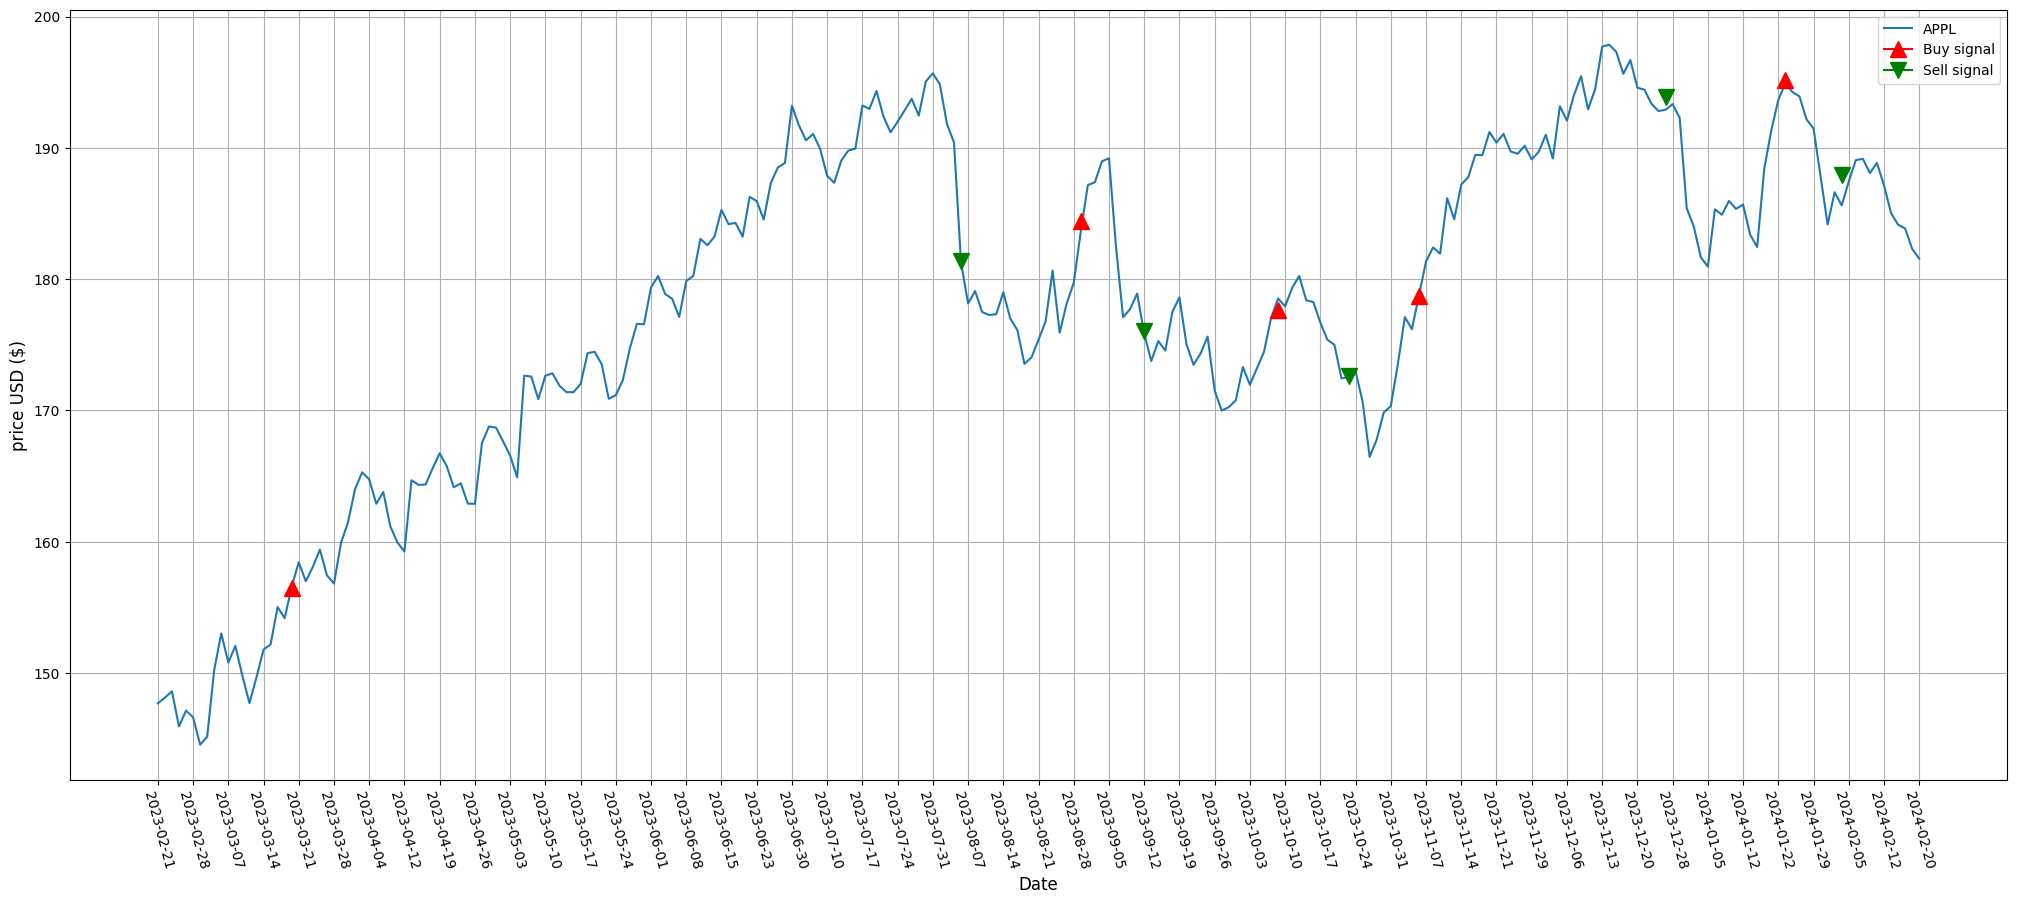

In [24]:
#charting data ------------------------------------------------------------
plt.figure(figsize=(25, 10))
plt.plot(close, label='APPL')
#plt.plot(x5, label='Close short')
#plt.plot(x20, label='Close long')

plt.plot(df.index,df['pricebuy'].values,color='red',label='Buy signal',marker='^',markersize=12)
plt.plot(df.index,df['pricesell'].values,color='green',label='Sell signal',marker='v',markersize=12)

n = 5  # Adjust n as per your data
plt.xticks(ticks=df.index[::n], labels=df.index[::n])
plt.xticks(rotation=-75)

plt.legend()
plt.xlabel('Date',fontsize=12)
plt.ylabel('price USD ($)',fontsize=12)
plt.grid()

## Part 4— Export results to Excel

In [4]:
#export to excel-------------------------------------------------------------
df.to_excel(current_directory+'/02-output/stock.xlsx', index=True)

# Day 2

## marketing data

In [ ]:
import matplotlib.pyplot as plt
import os
import sys
import pandas as pd
import numpy as np
import openpyxl
import pandas as pd
import statsmodels.api as sm
import numpy as np  # Importing numpy
from sklearn.model_selection import train_test_split


# Paths and directory
current_directory = os.getcwd()
print(current_directory)

file = os.path.join(current_directory, "01-data/marketingdata", "Marketing.xlsx")
df = pd.read_excel(file)

print(df.info)

Y = df['Sales']
X_cols = ['TV','FB','Flyer']  # List of column names for predictor variables

# Extract columns from df to create X DataFrame
X = df[X_cols]

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(Y, X).fit()

# Get model summary
print(model.summary())

'''
Income	Limit	Rating	Cards	Age	Education	Gender	Student	Married

'''



## Credit data

In [ ]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import statsmodels.api as sm

# Paths and directory
current_directory = os.getcwd()
print(current_directory)

file = os.path.join(current_directory, "01-data/credit", "credit.xlsx")
df = pd.read_excel(file)

print(df.info())

# Define your target variable
Y = df['Balance']

# Handle categorical variables using one-hot encoding
categorical_cols = ['Gender', 'Student', 'Married', 'Education']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Convert boolean dummies to int
for column in df.columns:
    if df[column].dtype == 'bool':
        df[column] = df[column].astype(int)

print(df.info())

# Drop the target variable from the DataFrame to get the predictor variables
X = df.drop('Balance', axis=1)

# Adding a constant to the model for the intercept
X = sm.add_constant(X)

# Fit the model with the training data
model = sm.OLS(Y, X).fit()

# Print the summary of the regression model
print(model.summary())


# Day 3

## ML auto regressor

In [26]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from numpy.random import randn


# Paths and directory
current_directory = os.getcwd()
print(current_directory)

file = os.path.join(current_directory, "01-data/ML_auto", "auto_regressor.xlsx")
df = pd.read_excel(file, usecols=['monthly_1000s'])  

s=preprocessing.MinMaxScaler()
scaled=s.fit_transform(df)
df_scaled=pd.DataFrame(scaled,columns=['norm'])

df_scaled['norm_prev01']=df_scaled['norm'].shift(1)
df_scaled['norm_prev02']=df_scaled['norm'].shift(2)
df_scaled['norm_prev03']=df_scaled['norm'].shift(3)
df_scaled['norm_target']=df_scaled['norm'].shift(-1)

df_scaled=df_scaled.dropna()
df_scaled=df_scaled.reset_index(drop=True)

df_scaled



/Users/danramirez/MBS


,norm,norm_prev01,norm_prev02,norm_prev03,norm_target
0,0.048263,0.054054,0.027027,0.015444,0.032819
1,0.032819,0.048263,0.054054,0.027027,0.059846
2,0.059846,0.032819,0.048263,0.054054,0.084942
3,0.084942,0.059846,0.032819,0.048263,0.084942
4,0.084942,0.084942,0.059846,0.032819,0.061776
...,...,...,...,...,...
135,1.000000,0.832046,0.710425,0.689189,0.969112
136,0.969112,1.000000,0.832046,0.710425,0.779923
137,0.779923,0.969112,1.000000,0.832046,0.689189
138,0.689189,0.779923,0.969112,1.000000,0.552124


In [33]:
train_ratio=0.7
total_x,total_y=[],[]

for i in range(df_scaled.shape[0]):
    total_x.append(np.array(df_scaled.loc[i,['norm','norm_prev01','norm_prev02','norm_prev03']].values))
    total_y.append(df_scaled.loc[i,'norm_target'])
total_x=np.array(total_x)
total_y=np.array(total_y)

print('The number of Total_x:',total_x.shape[0])
print('The number of Total_y:',total_y.shape[0])

The number of Total_x: 140
The number of Total_y: 140


In [39]:
train_x,Test_x,train_y,test_y = train_test_split(total_x,total_y,train_size= train_ratio)
print('The number of train_x:',train_x.shape[0])
print('The number of test_y:',test_y.shape[0])


The number of train_x: 98
The number of test_y: 42


In [41]:
def training (sample_x, sample_y, num_neuron,learning_rate=1e-4, epoch=5000):
    num_sample, in_dim=sample_x.shape[0],sample_y.shape[1]
    out_dim=sample_y.shape[1]
    w1=randn(in_dim,num_neuron)
    b1=randn(1,num_neuron)
    wo=randn(num_neuron,out_dim)
    bo=randn(1,out_dim)
#feed forward
    for i in range(epoch):
        s=1/(1+np.exp(-(sample_x.dot(w1)+b1)))
        y_pred=s.dot(wo) +bo
        loss= np.square(y_pred-sample_y).sum
        if np.mod(i,100)==0:
            print(i, loss)
#back-propogation
    grad_y_pred=2.0*(y_pred-sample_y)
    grad_wo=s.transpose().dot(grad_y_pred)
    grad_bo=grad_y_pred.sum
    grad_s=grad_y_pred.dot(wo.tranpsose())
    grad_w1=sample_x.tranpose().dot(grad_s*s(1-s))
    grad_b1=np.sum(grad_s*s(1-s,axis=0))

#udpate parameters
    w1= w1-learning_rate*grad_w1
    wo=wo=learning_rate*grad_wo
    b1=b1-learning_rate*grad_b1
    bo=bo-learning_rate*grad_bo

    return w1,wo,b1,bo
